<a href="https://colab.research.google.com/github/yoshihikom/thu_Details_of_Management_Information_BII_Lesson15/blob/main/%E7%B5%8C%E5%96%B6%E6%83%85%E5%A0%B1%E5%90%84%E8%AB%96B%E2%85%A1_%E7%AC%AC%EF%BC%91%EF%BC%95%E5%9B%9E_%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90_(2)%E7%B9%B0%E3%82%8A%E8%BF%94%E3%81%97%E3%81%AE%E3%81%AA%E3%81%84%E4%BA%8C%E5%85%83%E9%85%8D%E7%BD%AE%E3%81%AE%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経営情報各論BⅡ：15. 分散分析(2)

## (2)繰り返しのない二元配置の分散分析

### サンプルデータについて
サンプルデータは600人の若年男性を対象に100m走のタイムを計測した設定です．このとき，「シューズの違い」及び「走ったトラックの違い」の2つの要因が100m走のタイムに及ぼす影響を，pythonで二元配置分散分析をしながら統計的にみていきます．

要因は
シューズ条件：A社製シューズ[A]，B社製シューズ[B]，N社製シューズ[N]の3水準
トラック条件：グラウンド[Ground]，タータン[Tartan]の2水準（陸上トラックに使用されているコルクのような見た目の材質は「タータン」と呼ぶ）
の2つであり，条件数は2要因×3水準=6条件です．各条件につき100名が走っている設定です．

対象	若年男性600名
要因	シューズ（3水準），トラック（2水準）
指標	100m走ったタイム[s]
条件数	（シューズ3水準）×（トラック2水準）＝6条件（600人集めて各条件に付き100名ずつ走ってもらった設定）

### ライブラリのインポート

In [ ]:
    # 数値計算に使うライブラリ
    import pandas as pd
    import numpy as np
    import scipy as sp
    from scipy import stats as st

    # グラフを描画するライブラリ
    from matplotlib import pyplot as plt
    import seaborn as sns
    sns.set()

    # 統計モデルを推定するライブラリ
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    import statsmodels.stats.anova as anova # 分散分析やるライブラリ
    from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukeyの多重比較やるライブラリ

    from statsmodels.graphics.factorplots import interaction_plot
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm

    # 表示桁数の指定
    %precision 3

    # グラフをjupyter notebook内に表示させるための指定
    %matplotlib inline

### サンプルデータの読み込み

In [ ]:
    file = "Runtime.csv"
    data = pd.read_csv(file)

In [ ]:
    data.head(10) #データの中身を確認（先頭10行のみ）

,Unnamed: 0,ShoesMaker,Track,Time
0,0,A,Ground,15.624345
1,1,A,Ground,13.388244
2,2,A,Ground,13.471828
3,3,A,Ground,12.927031
4,4,A,Ground,14.865408
5,5,A,Ground,11.698461
6,6,A,Ground,15.744812
7,7,A,Ground,13.238793
8,8,A,Ground,14.319039
9,9,A,Ground,13.750630


### グラフの表示

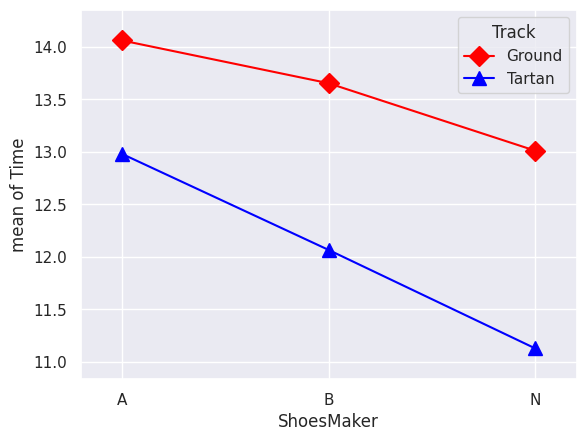

In [ ]:
    fig = interaction_plot(data.ShoesMaker, data.Track, data.Time, # (横軸にする要因（水準多い方），系列にする要因（水準少ない方），評価指標)
             colors=['red','blue'], markers=['D','^'], ms=10)

### グラフの解釈
平均時間が短い＝速く走れている

ということですので，横軸のシューズごとにみると，N社のシューズが他のシューズと比べて速く走れるシューズのようです．
また系列ごと（赤い線と青い線）にみると，Taratanで走ったほうが速く走れそうです．

加えて，N社製のシューズかつTaratanで走ると，なんだかますます速く走れそうであること（相乗効果がありそうなこと）が，グラフの傾き具合から言えるかもしれません．換言すれば，シューズ×トラックの交互作用もあるかもしれません．
そこで，二元配置の分散分析を実施します．

### 二元配置分散分析の実施

In [ ]:
    formula = 'Time ~ (Track) + (ShoesMaker) + (Track):(ShoesMaker)'
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    aov_table.columns = ["平方和","自由度","F値","p値"] #列名を日本語に差し替え
    print(aov_table) #被験者間効果の検定結果を出力

                         平方和    自由度          F値            p値
Track             345.591633    1.0  344.753535  4.987607e-61
ShoesMaker        211.505336    2.0  105.496206  6.228932e-40
Track:ShoesMaker   16.505274    2.0    8.232623  2.973539e-04
Residual          595.444018  594.0         NaN           NaN


In [ ]:
import math
print("C(Track) pvalue", 4.987607 * pow(math.e, -61))
print("C(ShoesMakere) pvalue", 6.228932 * pow(math.e, -40))
print("C(Track):C(ShoesMaker) pvalue", 2.973539 * pow(math.e, -4))

C(Track) pvalue 1.6066779359798328e-26
C(ShoesMakere) pvalue 2.6462709768122005e-17
C(Track):C(ShoesMaker) pvalue 0.05446226654556777


シューズやトラックで主効果がみられました．シューズ条件とトラック条件の間で交互作用がみられませんでした（ p > 0.05）．

### 講義で説明した例

In [ ]:
    file = "twoway_example.csv"
    data = pd.read_csv(file)
    data

,Unnamed: 0,feed,temp,weight
0,1,A,H,3.11
1,2,A,M,4.13
2,3,A,L,7.37
3,4,B,H,5.85
4,5,B,M,8.66
5,6,B,L,6.86
6,7,C,H,8.59
7,8,C,M,8.30
8,9,C,L,9.30
9,10,D,H,8.81


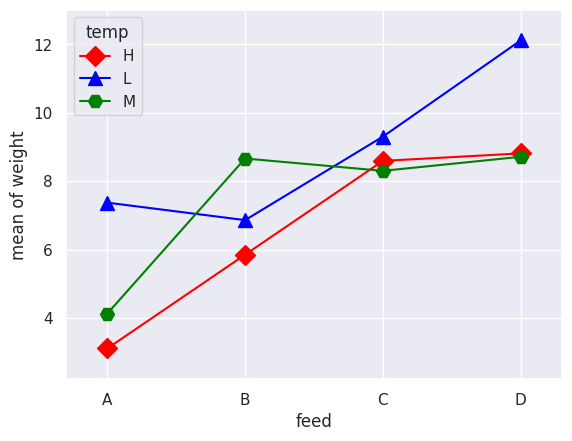

In [ ]:
    fig = interaction_plot(data.feed, data.temp, data.weight, # (横軸にする要因（水準多い方），系列にする要因（水準少ない方），評価指標)
              colors=['red','blue','green'], markers=['D','^','H'], ms=10)

In [ ]:
    formula = 'weight ~ (temp) + (feed)'
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    aov_table.columns = ["平方和","自由度","F値","p値"] #列名を日本語に差し替え
    print(aov_table) #被験者間効果の検定結果を出力

                平方和  自由度        F値        p値
temp      11.004800  2.0  3.012666  0.124212
feed      42.390667  3.0  7.736558  0.017433
Residual  10.958533  6.0       NaN       NaN


飼料の効果の$p$値が0.05（有意水準5%）以下で棄却域に入っているので，帰無仮説は棄却されます．よって，飼料の効果が認められます．

温度の効果の$p$値は0.05以上で棄却域に入っていないので，帰無仮説は棄却されません．よって，温度の効果は認められません．